In [1]:
import string
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
from keras import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, Dense, Embedding
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 20

In [3]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [21]:
model = Sequential()

In [6]:
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train,
                   y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 94us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 95us/step - loss: 0

In [7]:
imdb_dir = 'C:/Python/keras_training/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

In [8]:
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':     
            f = open(os.path.join(dir_name, fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [9]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)

In [10]:
tokenizer.fit_on_texts(texts)

In [11]:
sequences = tokenizer.texts_to_sequences(texts)

In [12]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88572 unique tokens.


In [13]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor> ', data.shape)
print('Shape of label tensor> ', labels.shape)

Shape of data tensor>  (24999, 100)
Shape of label tensor>  (24999,)


In [14]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [15]:
#loading vectorised words
glove_dir = 'C:/Python/keras_training/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [16]:
print('Found {} word vectors.'.format(len(embeddings_index)))

Found 400000 word vectors.


In [27]:
embeddings_dim = 100
embeddings_matrix = np.zeros((max_words, embeddings_dim))
for word,i in word_index.items():
    if i < max_words:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embeddings_matrix[i] = embeddings_vector

In [28]:
model = Sequential()
model.add(Embedding(max_words, embeddings_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
#loading pretrained vectorised words
model.layers[0].set_weights([embeddings_matrix])
model.layers[0].trainable = False

In [22]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [23]:
history = model.fit(x_train,
                    y_train,
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.6229 - acc: 0.5000 - val_loss: 0.7169 - val_acc: 0.5126
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5373 - acc: 0.6900 - val_loss: 0.7463 - val_acc: 0.5178
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5009 - acc: 0.7250 - val_loss: 0.6810 - val_acc: 0.5692
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2424 - acc: 0.9650 - val_loss: 1.0281 - val_acc: 0.4968
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2989 - acc: 0.8550 - val_loss: 0.7635 - val_acc: 0.5421
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2683 - acc: 0.9000 - val_loss: 0.7133 - val_acc: 0.5632
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0795 - acc: 1.0000 - val_loss: 0.8755 - val_acc: 0.5269
Epoch 8/10
200/200 [========

In [24]:
model.save_weights('pretrained_glove_model.h5')

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

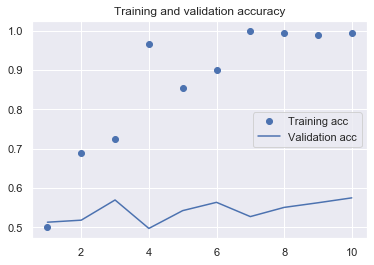

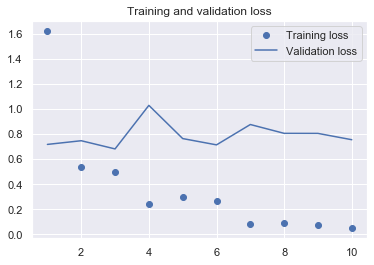

In [26]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embeddings_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [30]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [34]:
history = model.fit(x_train,
                    y_train,
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.1223 - acc: 0.5450 - val_loss: 0.7916 - val_acc: 0.5062
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6136 - acc: 0.6350 - val_loss: 0.9132 - val_acc: 0.5032
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4209 - acc: 0.8350 - val_loss: 0.7987 - val_acc: 0.5277
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4334 - acc: 0.7750 - val_loss: 0.6785 - val_acc: 0.5867
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2125 - acc: 0.9400 - val_loss: 0.7226 - val_acc: 0.5666
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1224 - acc: 1.0000 - val_loss: 1.1237 - val_acc: 0.5146
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1688 - acc: 0.9650 - val_loss: 0.911

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

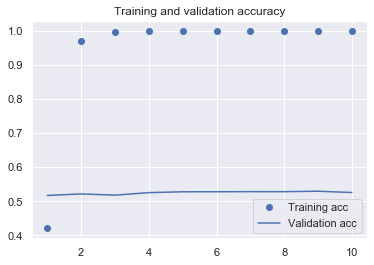

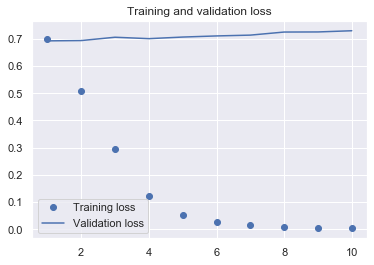

In [31]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [17]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [18]:
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [19]:
print('x_test.shape> ',x_test.shape,' y_test> ',y_test.shape)
print('sequences> ', len(sequences))

x_test.shape>  (24999, 100)  y_test>  (25000,)
sequences>  24999


In [ ]:
model.load_weights('pretrained_glove_model.h5')
model.evaluate(x_test, y_test)

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

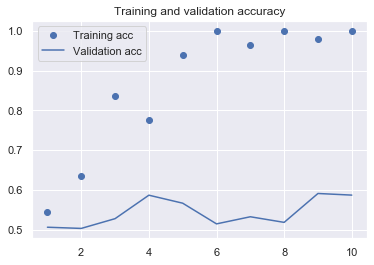

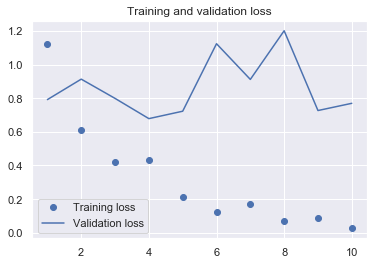

In [37]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();